In [83]:
# Bibliotecas

# Mongo connector
# !pip install pymongo

from pymongo import MongoClient # Mongo connector
import sqlite3 # SQLite3 connecor (already in python)

from bson.objectid import ObjectId # basic data structure
import datetime # basic data structure

import pandas as pd # advanced data structure

import matplotlib.pyplot as plt # visual eda

import pprint # json printer

<h1>Mongo</h1>

In [98]:
username = "leandrocl2006"
password = "YOUR_PASSWORD" !!! Não upe seu password para o Github !!! 

### Conexão

In [99]:
CONNECTION_STRING = f"mongodb+srv://{username}:{password}"
CONNECTION_STRING += "@cluster0.svbzbe8.mongodb.net/"
CONNECTION_STRING += "?retryWrites=true&w=majority"
  
client = MongoClient(CONNECTION_STRING)

### Criando database, collection e inserindo um registro

In [4]:
# Create and insert data on database

## database
db = client['test-database']

## collection
collection = db['posts']

## data
post = {"author": "Mike",
        "text": "My first blog post!",
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime.utcnow()}

# insert one document
posts = db.posts # collection
post_id = posts.insert_one(post).inserted_id

### Mostrando um documento por id

In [5]:
# read one
posts.find_one(post_id)

{'_id': ObjectId('646cc62012c0ddc99b0eddea'),
 'author': 'Mike',
 'text': 'My first blog post!',
 'tags': ['mongodb', 'python', 'pymongo'],
 'date': datetime.datetime(2023, 5, 23, 13, 56, 48, 616000)}

## Inserindo e listando todos os registros

In [6]:
# another data
another_post = {"author": "Ted Biller",
        "text": "My second blog post!",
        "tags": ["mongodb", "python", "database"],
        "date": datetime.datetime.utcnow()}

# insert another one
posts.insert_one(another_post)

# read and print all
for post in posts.find():
    pprint.pprint(post)

{'_id': ObjectId('646cc62012c0ddc99b0eddea'),
 'author': 'Mike',
 'date': datetime.datetime(2023, 5, 23, 13, 56, 48, 616000),
 'tags': ['mongodb', 'python', 'pymongo'],
 'text': 'My first blog post!'}
{'_id': ObjectId('646cc62212c0ddc99b0eddeb'),
 'author': 'Ted Biller',
 'date': datetime.datetime(2023, 5, 23, 13, 56, 50, 403000),
 'tags': ['mongodb', 'python', 'database'],
 'text': 'My second blog post!'}


## Inserindo vários registros

In [7]:
new_posts = [{"author": "Mike",
              "text": "Another post again!",
              "tags": ["bulk", "insert"],
              "date": datetime.datetime(2009, 11, 12, 11, 14)},
             {"author": "Eliot",
              "title": "MongoDB is fun",
              "text": "and pretty easy too!",
              "date": datetime.datetime(2009, 11, 10, 10, 45)}]
result = posts.insert_many(new_posts)

In [8]:
result.inserted_ids

[ObjectId('646cc62212c0ddc99b0eddec'), ObjectId('646cc62212c0ddc99b0edded')]

## Filtro por author

In [9]:
for post in posts.find({"author": "Mike"}):
    pprint.pprint(post)

{'_id': ObjectId('646cc62012c0ddc99b0eddea'),
 'author': 'Mike',
 'date': datetime.datetime(2023, 5, 23, 13, 56, 48, 616000),
 'tags': ['mongodb', 'python', 'pymongo'],
 'text': 'My first blog post!'}
{'_id': ObjectId('646cc62212c0ddc99b0eddec'),
 'author': 'Mike',
 'date': datetime.datetime(2009, 11, 12, 11, 14),
 'tags': ['bulk', 'insert'],
 'text': 'Another post again!'}


### Contagem com filtro

In [10]:
# posts with author Mike
posts.count_documents({"author": "Mike"})

2

In [11]:
# all posts
posts.count_documents({})

4

### Delete documents

In [12]:
result = posts.delete_one({"text": "My second blog post!"})
result.deleted_count

1

In [13]:
result = posts.delete_many({"author": "Mike"})
result.deleted_count

2

In [14]:
posts.count_documents({})

1

### Update a document

In [15]:
_filter = {'author': "Eliot", 'text': 'and pretty easy too!'}
_new = {'author': "Eliot", 'text': 'and pretty easy and cool too!'}
result = posts.replace_one(_filter, _new)
result.matched_count, result.modified_count

(1, 1)

In [16]:
posts.find_one({'author': 'Eliot'})

{'_id': ObjectId('646cc62212c0ddc99b0edded'),
 'author': 'Eliot',
 'text': 'and pretty easy and cool too!'}

In [17]:
posts.find_one({"_id": ObjectId("646cc0ccc91ac2b9f4507160")})

### Criando Pandas dataframe e salvando em .csv

In [18]:
df = pd.DataFrame(list(posts.find()))
df

,_id,author,text
0,646cc62212c0ddc99b0edded,Eliot,and pretty easy and cool too!


In [19]:
df.to_csv('posts.csv', index=None)

### Lendo arquivo .csv salvo

In [20]:
df = pd.read_csv('posts.csv')
df

,_id,author,text
0,646cc62212c0ddc99b0edded,Eliot,and pretty easy and cool too!


### Fechando conexão

In [28]:
client.close()

### Referência

- https://pymongo.readthedocs.io/en/stable/tutorial.html

# SQlite3

### Conexão

In [78]:
# connection
conn = sqlite3.connect("todo-app.db")

### Criando tabela e inserindo um registro

In [30]:
# create table
cursor = conn.cursor()
conn.execute("""
    create table if not exists tasks (
        id integer primary key autoincrement,
        description text,
        done integer)""")
    
# data
task = ("Lavar a louça", 1)

# insert data
conn.execute(
    "insert into tasks (description, done) values (?, ?)", task
)
conn.commit()

### Inserindo vários registros

In [35]:
# insert many
conn.execute(
    """
    INSERT INTO 'tasks' (description, done) VALUES
      ('Assistir Netflix', 1),
      ('Estudar matplotlib', 0),
      ('Estudar seaborn', 0),
      ('Estudar Pandas', 0);
    """
)
conn.commit()

### Mostrando um registro por id

In [41]:
task = conn.execute(
    """
        SELECT *
        FROM tasks
        WHERE id = 3
    """).fetchone()
task

(3, 'Estudar matplotlib', 0)

### Mostrando todos os registros

In [37]:
tasks = conn.execute(
    """
        SELECT * 
        FROM tasks
    """).fetchall()
for task in tasks:
    print(task)

(1, 'Lavar a louça', 1)
(2, 'Assistir Netflix', 1)
(3, 'Estudar matplotlib', 0)
(4, 'Estudar seaborn', 0)
(5, 'Estudar Pandas', 0)


### Mostrando registros por filtro

In [39]:
tasks = conn.execute(
    """
        SELECT * 
        FROM tasks
        WHERE done = 1
    """).fetchall()
for task in tasks:
    print(task)

(1, 'Lavar a louça', 1)
(2, 'Assistir Netflix', 1)


### Atualizando um registro

In [42]:
conn.execute(
    """
        UPDATE tasks
        SET done = 0 
        WHERE id = 1
    """)
conn.commit()

In [43]:
task = conn.execute(
    """
        SELECT *
        FROM tasks
        WHERE id = 1
    """).fetchone()
task

(1, 'Lavar a louça', 0)

### Contando registros

In [59]:
# number of tasks undone
count = conn.execute(
    """
        SELECT COUNT()
        FROM tasks 
        WHERE done = 0
    """).fetchone()[0]
count

4

### Add new column to table

In [60]:
conn.execute(
    """
        ALTER TABLE tasks
        ADD COLUMN category TEXT
        DEFAULT 'sem categoria'
    """)
conn.commit()

In [61]:
tasks = conn.execute(
    """
        SELECT * 
        FROM tasks
    """).fetchall()
for task in tasks:
    print(task)

(1, 'Lavar a louça', 0, 'sem categoria')
(2, 'Assistir Netflix', 1, 'sem categoria')
(3, 'Estudar matplotlib', 0, 'sem categoria')
(4, 'Estudar seaborn', 0, 'sem categoria')
(5, 'Estudar Pandas', 0, 'sem categoria')


### Update many

In [62]:
# update many
for i in range(1,6):
    _id = i
    if _id == 1:
        category = "casa"
    elif _id == 2:
        category = "laser"
    else:
        category = "faculdade"
    
    conn.execute(
        """
            UPDATE tasks
            SET category = '{}' 
            WHERE id = '{}' 
        """.format(category, _id))
conn.commit()

In [63]:
tasks = conn.execute(
    """
        SELECT * 
        FROM tasks
    """).fetchall()
for task in tasks:
    print(task)

(1, 'Lavar a louça', 0, 'casa')
(2, 'Assistir Netflix', 1, 'laser')
(3, 'Estudar matplotlib', 0, 'faculdade')
(4, 'Estudar seaborn', 0, 'faculdade')
(5, 'Estudar Pandas', 0, 'faculdade')


### Convert table to Pandas dataframe

In [79]:
df = pd.read_sql_query("SELECT * FROM tasks", conn, index_col='id')
df = df.reset_index()
df

,id,description,done,category
0,1,Lavar a louça,0,casa
1,2,Assistir Netflix,1,laser
2,3,Estudar matplotlib,0,faculdade
3,4,Estudar seaborn,0,faculdade
4,5,Estudar Pandas,0,faculdade


In [80]:
df.to_csv("tarefas.csv",index=None)

In [81]:
df = pd.read_csv("tarefas.csv")
df

,id,description,done,category
0,1,Lavar a louça,0,casa
1,2,Assistir Netflix,1,laser
2,3,Estudar matplotlib,0,faculdade
3,4,Estudar seaborn,0,faculdade
4,5,Estudar Pandas,0,faculdade


### EDA example

In [67]:
df_temp = df["category"].value_counts(normalize=True)
df_temp

faculdade    0.6
casa         0.2
laser        0.2
Name: category, dtype: float64

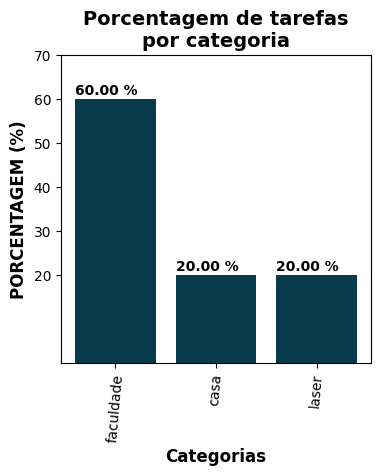

In [72]:
plt.figure(figsize=(4,4))

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Porcentagem de tarefas\npor categoria",    # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "Categorias",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+1))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, task in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[task] + 0.02,                      # posição y do texto
        "{:.2f} %".format(100*df_temp[task]),      # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()

### Fechando conexão

In [82]:
conn.close()